In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from scipy.stats import bernoulli
import numpy as np

In [2]:
G = nx.Graph()

In [3]:
G.add_node(1)

# Add multiple nodes in one go
G.add_nodes_from([2, 3])

# Nodes can be strings too
G.add_nodes_from(["u", "v"])

In [4]:
G.nodes()

NodeView((1, 2, 3, 'u', 'v'))

In [5]:
G.add_edge(1, 2)
G.add_edge("u", "v")

# If the node doesn't exist, Python creates it.
G.add_edges_from([(1,3), (1,4), (1,5), (1,6)])
G.add_edge("u", "w")

In [6]:
G.edges()

EdgeView([(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), ('u', 'v'), ('u', 'w')])

In [7]:
G.remove_node(2)
G.remove_nodes_from([4,5])

G.remove_edge(1,3)
G.remove_edges_from([(1,2), ("u", "v")])

G.edges()

EdgeView([(1, 6), ('u', 'w')])

In [8]:
print(G.number_of_edges())
print(G.number_of_nodes())

2
6


In [9]:
G = nx.karate_club_graph()

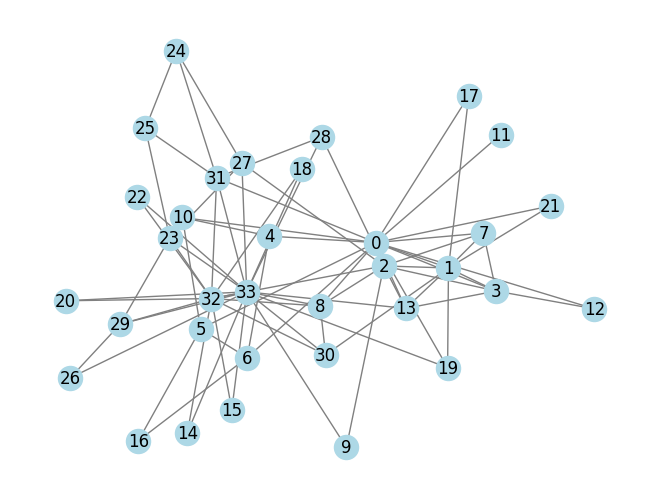

In [10]:
nx.draw(G, with_labels = True, node_color = "lightblue", edge_color = "gray")

In [11]:
G.degree()

DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

In [12]:
G.degree()[33]

17

In [13]:
print(G.number_of_nodes())
print(G.number_of_edges())

34
78


In [14]:
G.degree(0) is G.degree()[0]

True

In [15]:
bernoulli.rvs(p=0.2)

0

In [16]:
N = 20
p = 0.2

def er_graph(N, p):
    '''Generate an ER graph.'''
    # Create empty graph
    G = nx.Graph()
    # add all N nodes in the graph
    G.add_nodes_from(range(N))
    # loop over all pairs of nodes
    for node1 in G.nodes():
        for node2 in G.nodes():
        # add an edge with probability p
            if node1 < node2 and bernoulli.rvs(p=p):
                G.add_edge(node1, node2)

    return G

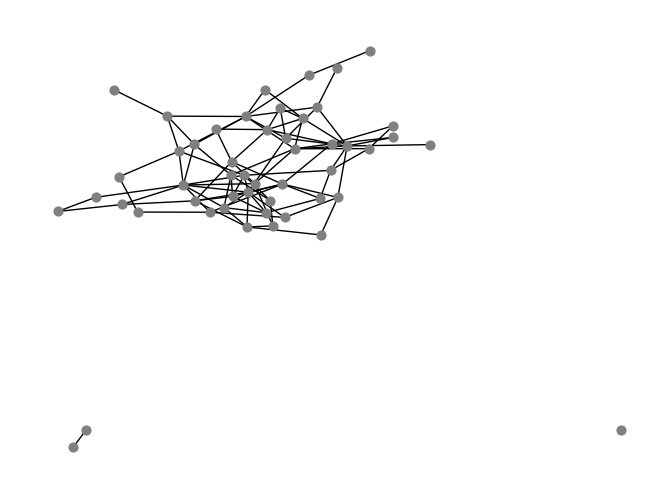

In [17]:
nx.draw(er_graph(50, 0.08), node_size = 40, node_color = "gray")

In [18]:
def plot_degree_distribution(G):
    
    degree_sequence = [d for n, d in G.degree()]
    plt.hist(degree_sequence, histtype="step")
    plt.xlabel("Degree $k$")
    plt.ylabel("$P(k)$")
    plt.title("Degree distribution")

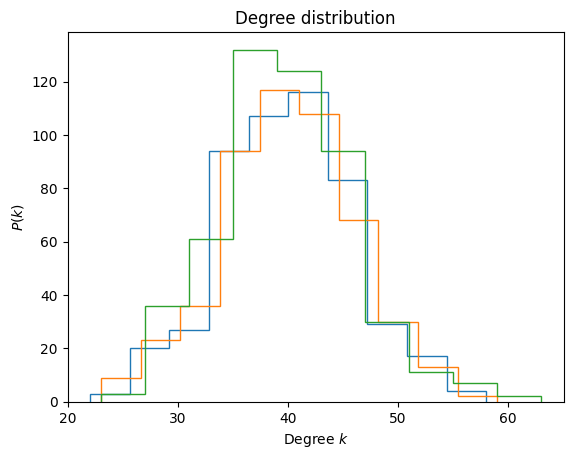

In [19]:
G1 = er_graph(500, 0.08)
plot_degree_distribution(G1)
G2 = er_graph(500, 0.08)
plot_degree_distribution(G2)
G3 = er_graph(500, 0.08)
plot_degree_distribution(G3)

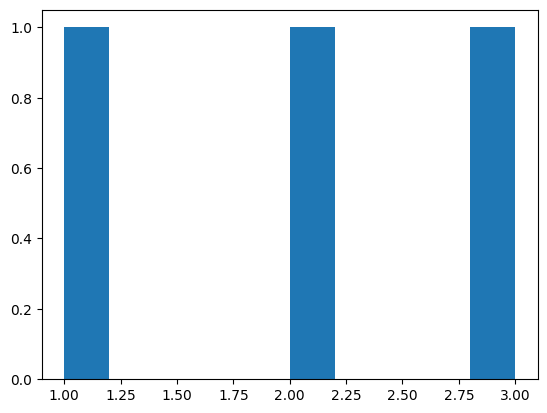

In [20]:
D = {1:1, 2:2, 3:3}
plt.hist(D);

In [21]:
a1 = np.loadtxt("vilno_1.csv", delimiter= ",")
a2 = np.loadtxt("vilno_2.csv", delimiter= ",")

In [22]:
G1 = nx.to_networkx_graph(a1)
G2 = nx.to_networkx_graph(a2)

In [23]:
def basic_net_stats(G):
    print("Number of nodes: %d" % G.number_of_nodes())
    print("Number of edges: %d" % G.number_of_edges())
    degree_sequence = [d for n, d in G.degree()]
    print("Average degree: %.2f" % np.mean(degree_sequence))

In [24]:
print("Stats village 1:")
basic_net_stats(G1)
print("Stats village 2:")
basic_net_stats(G2)

Stats village 1:
Number of nodes: 843
Number of edges: 3405
Average degree: 8.08
Stats village 2:
Number of nodes: 877
Number of edges: 3063
Average degree: 6.99


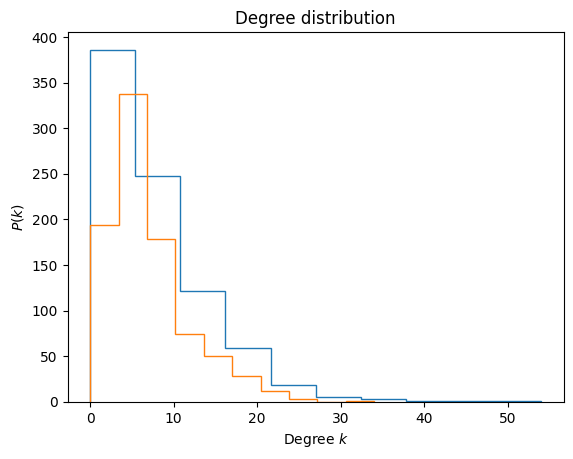

In [25]:
plot_degree_distribution(G1)
plot_degree_distribution(G2)

In [26]:
# nx.connected_components_subgraph has been replaced by nx.connected_components
gen = nx.connected_components(G1)
g = gen.__next__()
len(g)


825

In [27]:
G1_LCC = max(nx.connected_components(G1), key= len)
G2_LCC = max(nx.connected_components(G2), key= len)

print(len(G1_LCC))
print(len(G2_LCC))

825
810


In [28]:
print("Proportion of nodes contained in the largest node in G1:")
print(len(G1_LCC) / G1.number_of_nodes())
print("Proportion of nodes contained in the largest node in G2:")
print(len(G2_LCC) / G2.number_of_nodes())

Proportion of nodes contained in the largest node in G1:
0.9786476868327402
Proportion of nodes contained in the largest node in G2:
0.9236031927023945


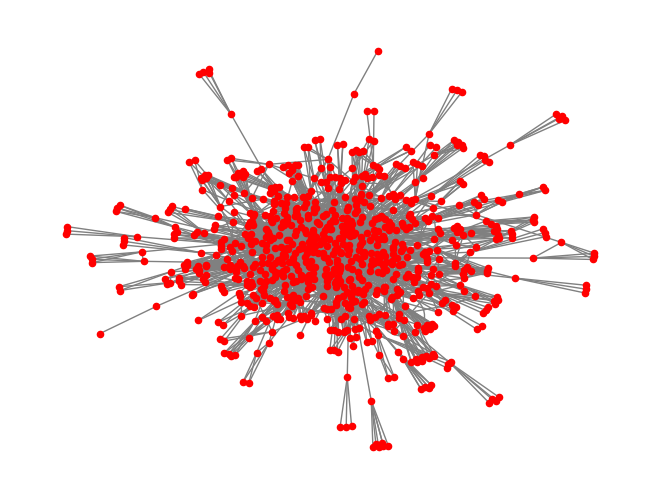

In [29]:
plt.figure()
subgraph1 = G1.subgraph(G1_LCC)
nx.draw(subgraph1, node_color = "red", edge_color = "gray", node_size = 20)

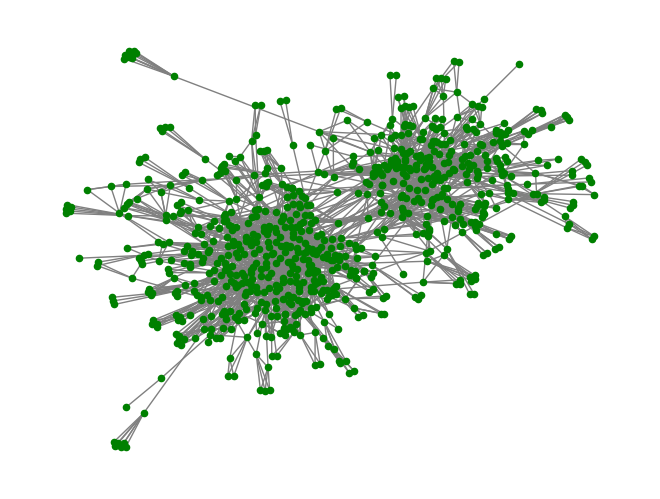

In [30]:
plt.figure()
subgraph2 = G2.subgraph(G2_LCC)
nx.draw(subgraph2, node_color = "green", edge_color = "gray", node_size = 20)